In [13]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [9]:
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [12]:
x=data['TV']
y=data['Sales']
xc=sm.add_constant(x)

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=10)

In [16]:
#$#Simple linear regression

In [49]:
model12=sm.OLS(y_train,x_train)
model12=model12.fit()
print(model12.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              2239.
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                    1.34e-95
Time:                        15:56:58   Log-Likelihood:                         -450.91
No. Observations:                 160   AIC:                                      903.8
Df Residuals:                     159   BIC:                                      906.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [33]:
model12.bse

TV    0.001931
dtype: float64

<Axes: xlabel='TV', ylabel='Sales'>

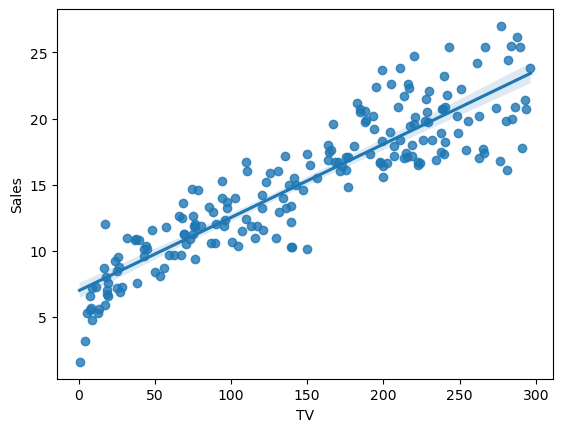

In [35]:
sns.regplot(x=x,y=y)

In [37]:
ypred=model12.predict(x_test)
ypred

59     19.255567
5       0.795080
20     19.959259
198    25.917792
52     19.776481
19     13.461533
162    17.217602
55     18.177182
69     19.813037
2       1.571883
98     26.475262
10      6.040783
75      1.544466
142    20.151175
124    20.973671
63      9.385604
109    23.340635
78      0.493498
111    22.088612
185    18.734652
154    17.162769
130     0.063972
61     23.879827
87     10.116712
102    25.607071
121     1.718105
136     2.339547
1       4.066790
47     21.924112
172     1.791216
159    12.035872
39     20.836589
76      2.513185
91      2.613712
35     26.566650
178    25.287211
127     7.329361
169    25.981764
46      8.197553
174    20.324813
dtype: float64

In [38]:
SSR=np.sum((ypred-y_test.mean())**2)

In [41]:
SSE=np.sum((y_test-ypred)**2)

In [45]:
SST=SSE+SSR
print(SSE)
print(SSR)
print(SST)


882.239315285604
3501.289833583469
4383.529148869073


In [47]:
r_sq=SSR/SST
r_sq

0.7987376642600365